# The Weather API Analysis

## Import dependencies

In [ ]:
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests
import pandas as pd
from config import weather_apikey
from citipy import citipy
import random as rand
%matplotlib inline
import numpy as np

## Set up query url

In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_apikey}&units={units}&q="



## Generation of random coordinates

In [63]:
rep = 600
lat_min = -90
lat_max = 90
latitudes = [] 
  
for x in range(rep): 

    latitudes.append(random.randint(lat_min, lat_max)) 
  


#latitudes

In [64]:
rep = 600
long_min = -180
long_max = 180
longitudes = []
for x in range(600): 

    longitudes.append(random.randint(lat_min, lat_max)) 

    
#longitudes    

## Construction of a dataframe to hold the information

In [65]:
cities_df = pd.DataFrame({"Latitudes": latitudes, "Longitudes": longitudes})


In [66]:
cities_df["City"] = ""
cities_df["Country code"] = ""
cities_df.head()


,Latitudes,Longitudes,City,Country code
0,-56,82,,
1,54,-20,,
2,38,3,,
3,16,-55,,
4,-90,-42,,


In [67]:
# generate city names from citipy
for index, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitudes"],row["Longitudes"])
    cities_df.at[index, "City"] = city.city_name   
    cities_df.at[index,"Country code"]=city.country_code
cities_df.head()

,Latitudes,Longitudes,City,Country code
0,-56,82,busselton,au
1,54,-20,vestmannaeyjar,is
2,38,3,algiers,dz
3,16,-55,bathsheba,bb
4,-90,-42,ushuaia,ar


In [68]:
cities_df = cities_df.drop_duplicates()
print(len(cities_df))

594


In [69]:
cities_df.to_csv('cities.csv')

In [70]:
cities = cities_df['City'].tolist()

## API data retrieval

In [71]:
# set up lists to hold reponse info
lat = []
long = []
temp = []
humidity = []
clouds =[]
wind = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except:
        lat.append("na")
        long.append("na")
        temp.append("na")
        humidity.append("na")
        clouds.append("na")
        wind.append("na")
     

In [74]:
weather_dict = {
    "city": cities,
    "latitude": lat,
    "longitude": long,
    "temperature": temp,
    "humidity": humidity,
    "cloudiness": clouds,
    "max windspeed": wind
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,latitude,longitude,temperature,humidity,cloudiness,max windspeed
0,busselton,-33.64,115.35,24.09,80,0,6.87
1,vestmannaeyjar,63.44,-20.27,-0.79,100,0,6.72
2,algiers,29.94,-90.04,12.6,57,1,1.5
3,bathsheba,13.22,-59.52,25,73,40,7.2
4,ushuaia,-54.81,-68.31,7,81,75,12.3


In [75]:
weather_data = weather_data[weather_data.temperature != "na"]


In [76]:
weather_data['latitude'] = pd.to_numeric(weather_data['latitude'])
weather_data['longitude'] = pd.to_numeric(weather_data['longitude'])
weather_data['temperature'] = pd.to_numeric(weather_data['temperature'])
weather_data['humidity'] = pd.to_numeric(weather_data['humidity'])
weather_data['cloudiness'] = pd.to_numeric(weather_data['cloudiness'])
weather_data['max windspeed'] = pd.to_numeric(weather_data['max windspeed'])
weather_data.dtypes

city              object
latitude         float64
longitude        float64
temperature      float64
humidity           int64
cloudiness         int64
max windspeed    float64
dtype: object

In [77]:
weather_data.count()

city             514
latitude         514
longitude        514
temperature      514
humidity         514
cloudiness       514
max windspeed    514
dtype: int64

In [78]:
weather_data = weather_data.sample(n=500)
weather_data.count()

city             500
latitude         500
longitude        500
temperature      500
humidity         500
cloudiness       500
max windspeed    500
dtype: int64

In [79]:
weather_data.to_csv('weather_data.csv')

## Loading weather data from a csv file

In [2]:
file_name = 'weather_data.csv'

weather_data_csv = pd.read_csv(file_name)
weather_data_csv.head()

,Unnamed: 0,city,latitude,longitude,temperature,humidity,cloudiness,max windspeed
0,12,hermanus,-34.42,19.24,17.56,95,88,2.02
1,190,hithadhoo,-0.60,73.08,28.72,100,64,2.47
2,173,cabedelo,-6.97,-34.84,25.00,94,75,2.60
3,281,joshimath,30.57,79.57,-20.86,83,8,0.62
4,454,cape town,-33.93,18.42,18.00,93,20,7.20


## Data visualization

In [3]:
conditions = [
    (weather_data_csv['temperature'] < -10), #darkturquoise
    (weather_data_csv['temperature'] >= -10) & (weather_data_csv['temperature'] < 0), #blue
    (weather_data_csv['temperature'] >= 0) & (weather_data_csv['temperature'] < 10), #lightblue
    (weather_data_csv['temperature'] >= 10) & (weather_data_csv['temperature'] < 25),#white
    (weather_data_csv['temperature'] >= 22) & (weather_data_csv['temperature'] < 30),#coral
    (weather_data_csv['temperature'] >= 30)] # red
 
choices = ['darkblue', 'aquamarine','lightblue', 'white','coral', 'red', ]

weather_data_csv['color'] = np.select(conditions, choices, default='black')

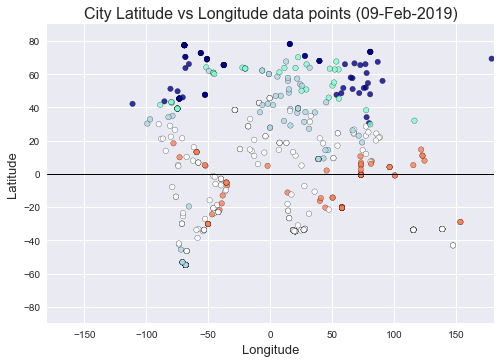

In [58]:
x = weather_data_csv['longitude'].values
y = weather_data_csv['latitude'].values
c =  weather_data_csv['color'].values

plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.80, s = 30)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Longitude data points (09-Feb-2019)', fontsize=16)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.xlim(-180, 180) 
plt.ylim(-90, 90) 
plt.axhline(0, color='black', lw=1)
plt.savefig('Latitude_vs_Longitude_data_points.png', bbox_inches="tight")

plt.show()
plt.close()

In [13]:
lat = weather_data_csv['latitude'].values
lon = weather_data_csv['longitude'].values
temperature = weather_data_csv['temperature'].values


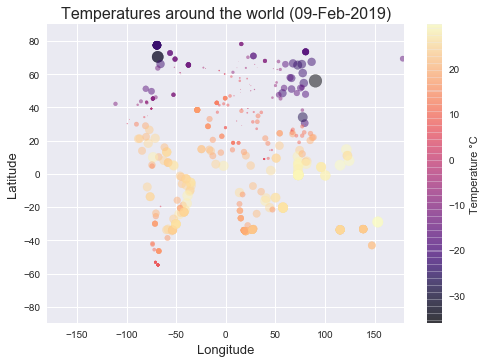

In [54]:
x = weather_data_csv['longitude'].values
y = weather_data_csv['latitude'].values
colors =  weather_data_csv['temperature'].values
area = np.pi * (0.2 * colors)**2  
plt.title('Temperatures around the world (09-Feb-2019)', fontsize=16)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='magma')
plt.xlim(-180, 180) 
plt.ylim(-90, 90) 
clb = plt.colorbar()
clb.set_label('Temperature °C')
plt.savefig('Latitude_vs_Longitude_temperature.png', bbox_inches="tight")

plt.show()

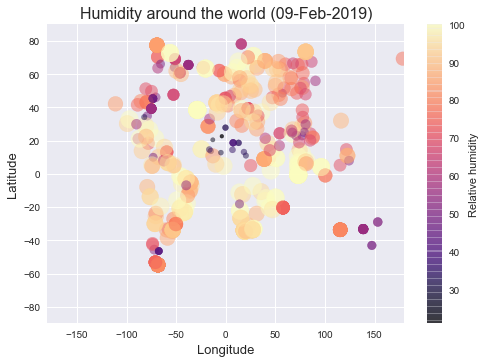

In [55]:
x = weather_data_csv['longitude'].values
y = weather_data_csv['latitude'].values
colors =  weather_data_csv['humidity'].values
area = np.pi * (0.1 * colors)**2  
plt.title('Humidity around the world (09-Feb-2019)', fontsize=16)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='magma')
plt.xlim(-180, 180) 
plt.ylim(-90, 90) 
clb = plt.colorbar()
clb.set_label('Relative humidity')
plt.savefig('Latitude_vs_Longitude_humidity.png', bbox_inches="tight")

plt.show()

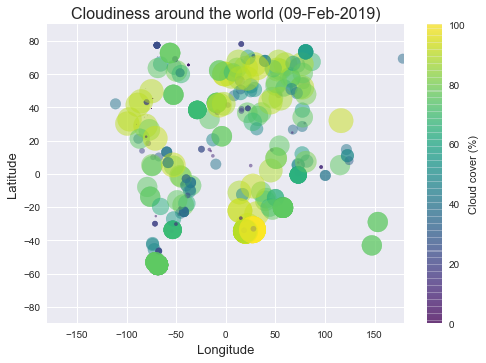

In [56]:
x = weather_data_csv['longitude'].values
y = weather_data_csv['latitude'].values
colors =  weather_data_csv['cloudiness'].values
area = np.pi * (0.15 * colors)**2  
plt.title('Cloudiness around the world (09-Feb-2019)', fontsize=16)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='viridis')
plt.xlim(-180, 180) 
plt.ylim(-90, 90) 
clb = plt.colorbar()
clb.set_label('Cloud cover (%)')
plt.savefig('Latitude_vs_Longitude_cloud.png', bbox_inches="tight")

plt.show()

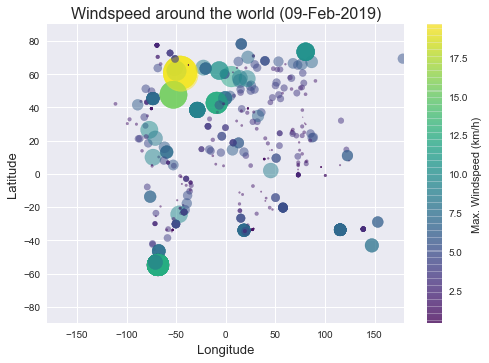

In [57]:
x = weather_data_csv['longitude'].values
y = weather_data_csv['latitude'].values
colors =  weather_data_csv['max windspeed'].values
area = np.pi * (1 * colors)**2  
plt.title('Windspeed around the world (09-Feb-2019)', fontsize=16)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='viridis')
plt.xlim(-180, 180) 
plt.ylim(-90, 90) 
clb = plt.colorbar()
clb.set_label('Max. Windspeed (km/h)')
plt.savefig('Latitude_vs_Longitude_wind.png', bbox_inches="tight")

plt.show()